In [1]:
import cv2
import numpy as np

In [2]:
img = cv2.imread('poster.jpg') # read the image
img = cv2.resize(img, (0, 0), None, .7, .7) # resize
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [3]:
# KERNELS
# divide every kernel to 9, in order to preserve the original brightness
edgeDetectionKernel = np.array(([[0, -1, 0],   ## Laplacian
                               [-1, 4, -1], 
                               [0, -1, 0]]), 
                         np.float32)/9 
edgeDetectionKernel2 = np.array(([[-1, -1, -1], 
                               [-1, 8, -1], 
                               [-1, -1, -1]]), 
                         np.float32)/9
sharpenKernel = np.array(([[0, -1, 0], 
                           [-1, 5, -1], 
                           [0, -1, 0]]), 
                         np.float32)/9
sharpenKernel50 = np.array(([[0, -1, 0], 
                           [-1, 50, -1], 
                           [0, -1, 0]]), 
                         np.float32)/9 
gaussianBlurKernel = np.array(([[1, 2, 1], 
                                [2, 4, 2],
                                [1, 2, 1]]), 
                              np.float32)/9 
meanBlurKernel = np.ones((3, 3), np.float32)/9
prewittXKernel = np.array(([[1, 0, -1], 
                           [1, 0, -1], 
                           [1, 0, -1]]), 
                         np.float32)/9 
prewittYKernel = prewittXKernel.T # transpose
sobelXKernel = np.array(([[1, 0, -1], 
                         [2, 0, -2], 
                         [1, 0, -1]]), 
                         np.float32)/9 
sobelYKernel = sobelXKernel.T

In [4]:
kernels = [edgeDetectionKernel, edgeDetectionKernel2, sharpenKernel, sharpenKernel50, gaussianBlurKernel, meanBlurKernel]
names = ['edgeDetection', 'edgeDetection2', 'sharpen', 'sharpen50', 'gaussianBlur', 'meanBlur']

In [5]:
# COLOR IMAGE
for i in range(len(kernels)):
    filtered_image = cv2.filter2D(src=img, kernel = kernels[i], ddepth = -1)
    
    horizontalStack = np.concatenate((img, filtered_image), axis = 1) # concat original img + filtered img
#     cv2.imshow("ORIGINAL + " + names[i] , horizontalStack) # show
    
    cv2.imwrite("filtered/poster " + names[i] + ".jpg", filtered_image) # save img
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [6]:
# GRAY SCALE
for i in range(len(kernels)):
    filtered_image = cv2.filter2D(src=gray, kernel = kernels[i], ddepth = -1)
    
    horizontalStack = np.concatenate((gray, filtered_image), axis = 1) # concat original img + filtered img
#     cv2.imshow("GRAY + " + names[i] , horizontalStack) # show
    
    cv2.imwrite("filtered/GRAY " + names[i] + ".jpg", filtered_image) # save img
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [7]:
# PREWITT
img_prewittx = cv2.filter2D(src = img, kernel = prewittXKernel, ddepth = -1)
img_prewitty = cv2.filter2D(src = img, kernel = prewittYKernel, ddepth = -1)

# cv2.imshow("PrewittX", img_prewittx)
# cv2.imshow("PrewittY", img_prewitty)
# cv2.imshow("Prewitt", img_prewittx + img_prewitty)

cv2.imwrite("filtered/Prewitt.jpg", img_prewittx + img_prewitty) # save img
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
# SOBEL 
img_sobelx  = cv2.filter2D(src = img, kernel = sobelXKernel, ddepth = -1)
img_sobely  = cv2.filter2D(src = img, kernel = sobelYKernel, ddepth = -1)

# cv2.imshow("Sobel X", img_sobelx)
# cv2.imshow("Sobel Y", img_sobely)

cv2.imwrite("filtered/Sobel.jpg", img_sobelx + img_sobely) # save img

cv2.waitKey(0)
cv2.destroyAllWindows()

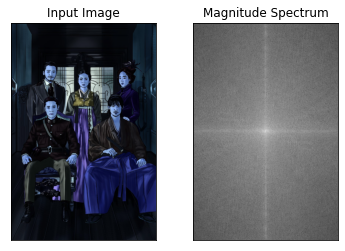

In [9]:
###### FFT 
from matplotlib import pyplot as plt

f = np.fft.fft2(gray) #2-D fft on gray scale image
fshift = np.fft.fftshift(f)  #place the zero-frequency component to the center of the spectrum
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()  

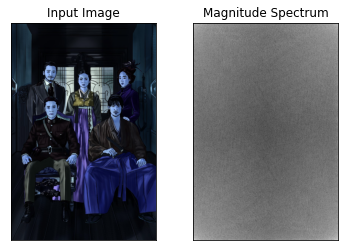

In [10]:
f = np.fft.fft2(gray)
fshift = np.fft.fftshift(f)
fshift = np.fft.ifftshift(fshift) #undo the shift (the magnitude spectrum is done on the original image)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()  